![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/multi_lingual/multi_class_text_classification/NLU_training_multi_lingual_multi_class_text_classifier_demo.ipynb)




# Training a Deep Learning Classifier with NLU 
## ClassifierDL (Multi-class Text Classification)
With the [ClassifierDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl-multi-class-text-classification) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data :

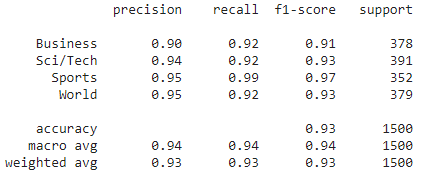

<br>


You can achieve these results or even better on this dataset with test data :

<br>

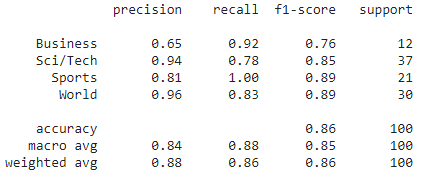


# 1. Install Java 8 and NLU

In [ ]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu > /dev/null pyspark==2.4.7

import nlu

# 2. Download news classification dataset

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/news_category_test_multi_lingual.csv

--2021-02-26 11:57:45--  http://ckl-it.de/wp-content/uploads/2021/02/news_category_test_multi_lingual.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1592801 (1.5M) [text/csv]
Saving to: ‘news_category_test_multi_lingual.csv’

news_category_test_ 100%[===================>]   1.52M  1.40MB/s    in 1.1s    

2021-02-26 11:57:47 (1.40 MB/s) - ‘news_category_test_multi_lingual.csv’ saved [1592801/1592801]



In [ ]:
import pandas as pd
test_path = '/content/news_category_test_multi_lingual.csv'
train_df = pd.read_csv(test_path)
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,Unnamed: 0,y,text,test_sentences
1031,1031,Sci/Tech,"Aether Systems Inc., a Maryland wireless data...",
6566,6566,Business,Renee McDonald remembers the Christmas trees o...,
5122,5122,World,Personal freedoms in Canada are being eroded b...,
7312,7312,World,The DUP was last night reconsidering its boyco...,
1231,1231,Sci/Tech,Making games for the future consoles is going ...,
...,...,...,...,...
2189,2189,Business,The Ontario Securities Commission is warning ...,
1544,1544,World,A US military intelligence soldier in Iraq has...,
2535,2535,Business,Troubled carrier US Airways has asked a US ban...,
7383,7383,Sports,Manchester City chairman John Wardle has not ...,


# 3. Train Deep Learning Classifier using nlu.load('train.classifier')

By default, the Universal Sentence Encoder Embeddings (USE) are beeing downloaded to provide embeddings for the classifier. You can use any of the 50+ other sentence Emeddings in NLU tough!

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.classifier')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['classifier_dl'].setMaxEpochs(60)  
trainable_pipe['classifier_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df.iloc[:1500])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:1500],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['category']))

preds

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
              precision    recall  f1-score   support

    Business       0.90      0.92      0.91       378
    Sci/Tech       0.94      0.92      0.93       391
      Sports       0.95      0.99      0.97       352
       World       0.95      0.92      0.93       379

    accuracy                           0.93      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.93      0.93      0.93      1500



,category,test_sentences,document,y,Unnamed: 0,xx_embed_sentence_labse_embeddings,category_confidence,text
origin_index,,,,,,,,
1031,Sci/Tech,,"Aether Systems Inc., a Maryland wireless data ...",Sci/Tech,1031,"[-0.018817514181137085, -0.018930165097117424,...",0.992930,"Aether Systems Inc., a Maryland wireless data..."
6566,Sports,,Renee McDonald remembers the Christmas trees o...,Business,6566,"[-0.033650271594524384, 0.04151156544685364, 0...",0.999996,Renee McDonald remembers the Christmas trees o...
5122,World,,Personal freedoms in Canada are being eroded b...,World,5122,"[-0.00797173660248518, -0.05635803937911987, -...",0.999978,Personal freedoms in Canada are being eroded b...
7312,World,,The DUP was last night reconsidering its boyco...,World,7312,"[-0.04457780346274376, -0.013035906478762627, ...",0.998248,The DUP was last night reconsidering its boyco...
1231,Sci/Tech,,Making games for the future consoles is going ...,Sci/Tech,1231,"[0.00020110986952204257, -0.04935045540332794,...",1.000000,Making games for the future consoles is going ...
...,...,...,...,...,...,...,...,...
1518,Sports,,While Rafael Furcal #39;s DUI arrest on Friday...,Sports,1518,"[0.03824271634221077, -0.050272781401872635, 0...",1.000000,While Rafael Furcal #39;s DUI arrest on Friday...
2631,Sports,,The Redskins and Cowboys are underway from Fed...,Sports,2631,"[0.03182480111718178, -0.027464378625154495, -...",1.000000,The Redskins and Cowboys are underway from Fed...
809,Sports,,seeded Russian Elena Bovina won her first titl...,Sports,809,"[-0.017956998199224472, 0.05119836702942848, 0...",1.000000,seeded Russian Elena Bovina won her first titl...


# 3.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['category']))

              precision    recall  f1-score   support

    Business       0.79      0.81      0.80       364
    Sci/Tech       0.83      0.80      0.82       388
      Sports       0.93      0.95      0.94       392
       World       0.84      0.83      0.83       376

    accuracy                           0.85      1520
   macro avg       0.85      0.85      0.85      1520
weighted avg       0.85      0.85      0.85      1520



# 4. Test Model  with  20 languages!

In [ ]:
train_df = pd.read_csv("news_category_test_multi_lingual.csv")
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['category']))

preds

              precision    recall  f1-score   support

    Business       0.65      0.92      0.76        12
    Sci/Tech       0.94      0.78      0.85        37
      Sports       0.81      1.00      0.89        21
       World       0.96      0.83      0.89        30

    accuracy                           0.86       100
   macro avg       0.84      0.88      0.85       100
weighted avg       0.88      0.86      0.86       100



,text,xx_embed_sentence_labse_embeddings,category_confidence,y,document,category
origin_index,,,,,,
0,టర్నర్ నెవాల్ వద్ద కార్మికులకు ప్రాతినిధ్యం వహ...,"[-0.05777165666222572, -0.011031209491193295, ...",0.999994,Business,టర్నర్ నెవాల్ వద్ద కార్మికులకు ప్రాతినిధ్యం వహ...,Business
1,"Торонто, Канада # 36; 10 миллион Ансари X прем...","[-0.039270948618650436, -0.05998489260673523, ...",0.999874,Sci/Tech,"Торонто, Канада # 36; 10 миллион Ансари X прем...",Sci/Tech
2,Une société fondée par un chercheur en chimie ...,"[-0.047125183045864105, -0.025509396567940712,...",0.999995,Sci/Tech,Une société fondée par un chercheur en chimie ...,Sci/Tech
3,সবেমাত্র ভোর যখন মাইক ফিৎসপ্যাট্রিক রঙিন মানচি...,"[-0.04609032720327377, -0.05127093940973282, -...",0.999889,Sci/Tech,সবেমাত্র ভোর যখন মাইক ফিৎসপ্যাট্রিক রঙিন মানচি...,Sci/Tech
4,Көньяк Калифорниянең томанга каршы көрәш агент...,"[-0.02939729019999504, -0.040420372039079666, ...",0.314981,Sci/Tech,Көньяк Калифорниянең томанга каршы көрәш агент...,Sports
...,...,...,...,...,...,...
95,ఫుట్‌బాల్ అసోసియేషన్ ప్రతిష్టను దెబ్బతీసిన కుం...,"[0.02515975944697857, -0.026320775970816612, -...",0.999963,Sports,ఫుట్‌బాల్ అసోసియేషన్ ప్రతిష్టను దెబ్బతీసిన కుం...,Sports
96,"Hücumçu Emile Heskey, Çərşənbə # 39-un Çərşənb...","[0.04458567127585411, 0.03187408298254013, -0....",1.000000,Sports,"Hücumçu Emile Heskey, Çərşənbə # 39-un Çərşənb...",Sports
97,"Staples Inc. & lt; A HREF = ""http://www.invest...","[-0.016342557966709137, -0.004877099301666021,...",0.999987,Business,"Staples Inc. & lt; A HREF = ""http://www.invest...",Business


# The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:
fitted_pipe.predict("There have been a great increase in businesses over the last decade ")


,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,There have been a great increase in businesses...,"[0.012169226072728634, -0.002660397905856371, ...",0.996130


In [ ]:
fitted_pipe.predict("Science has advanced rapidly over the last century ")


,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,Science has advanced rapidly over the last cen...,"[0.022739626467227936, -0.03467154502868652, -...",0.999995


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# German for: 'Businesses are the best way of making profit'
fitted_pipe.predict("Unternehmen sind der beste Weg, um Gewinn zu erzielen")


,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,"Unternehmen sind der beste Weg, um Gewinn zu e...","[-0.048822492361068726, -0.0071628582663834095...",0.999487


In [ ]:
# German for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Die Wissenschaft hat im letzten Jahrhundert rasante Fortschritte gemacht ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,Die Wissenschaft hat im letzten Jahrhundert ra...,"[0.035708025097846985, -0.04514779895544052, -...",0.999999


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("在过去的十年中，业务有了很大的增长 ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,在过去的十年中，业务有了很大的增长,"[0.007143490947782993, -0.003197029000148177, ...",0.574210


In [ ]:
# Chinese for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("在上个世纪，科学发展迅速 ")
		

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,在上个世纪，科学发展迅速,"[0.01899210549890995, -0.05363348498940468, -0...",0.999645


# Model understands Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:
#  Afrikaans for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("Daar het die afgelope dekade 'n groot toename in besighede plaasgevind ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,Daar het die afgelope dekade 'n groot toename ...,"[0.028091464191675186, -0.016515646129846573, ...",0.929858


In [ ]:
#  Afrikaans for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Die wetenskap het die afgelope eeu vinnig gevorder ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,Die wetenskap het die afgelope eeu vinnig gevo...,"[0.02647087350487709, -0.04339253529906273, -0...",0.999996


# The model understands Vietnamese
![vi](https://www.worldometers.info/img/flags/small/tn_vm-flag.gif)

In [ ]:
# Vietnamese for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("Đã có sự gia tăng đáng kể trong các doanh nghiệp trong thập kỷ qua ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,Đã có sự gia tăng đáng kể trong các doanh nghi...,"[0.002593805780634284, -0.03647594526410103, -...",0.979494


In [ ]:
# Vietnamese for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Khoa học đã phát triển nhanh chóng trong thế kỷ qua ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,Khoa học đã phát triển nhanh chóng trong thế k...,"[0.006926446221768856, -0.0595879964530468, -0...",0.999535


# The model understands Japanese
![ja](https://www.worldometers.info/img/flags/small/tn_ja-flag.gif)


In [ ]:
# Japanese for: 'Businesses are the best way of making profit'
fitted_pipe.predict("ビジネスは利益を上げるための最良の方法です")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,ビジネスは利益を上げるための最良の方法です,"[-0.029112381860613823, -0.022607827559113503,...",0.683041


In [ ]:
# Japanese for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("科学は前世紀にわたって急速に進歩しました ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,科学は前世紀にわたって急速に進歩しました,"[0.01969727873802185, -0.04392292723059654, -0...",0.999981


# The model understands Zulu
![zu](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
#  Zulu for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("Kube nokwanda okukhulu emabhizinisini kule minyaka eyishumi edlule ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,Kube nokwanda okukhulu emabhizinisini kule min...,"[0.011455212719738483, -0.019759127870202065, ...",0.998235


In [ ]:
#  Zulu for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Isayensi ithuthuke ngokushesha ngekhulu leminyaka elidlule ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,Isayensi ithuthuke ngokushesha ngekhulu leminy...,"[0.033070385456085205, -0.04442666471004486, -...",0.999992


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:
#  Turkish for: 'Businesses are the best way of making profit'
fitted_pipe.predict("İşletmeler kar elde etmenin en iyi yoludur ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,İşletmeler kar elde etmenin en iyi yoludur,"[-0.023345213383436203, 0.0005469206953421235,...",0.997994


In [ ]:
#  Turkish for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Bilim, geçen yüzyılda hızla ilerledi ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,"Bilim, geçen yüzyılda hızla ilerledi","[0.01670285314321518, -0.050043221563100815, -...",0.999998


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Hebrew for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("חלה עלייה גדולה בעסקים בעשור האחרון ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,חלה עלייה גדולה בעסקים בעשור האחרון,"[0.030628306791186333, -0.022280622273683548, ...",0.999873


In [ ]:
# Hebrew for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("המדע התקדם במהירות במהלך המאה האחרונה ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,המדע התקדם במהירות במהלך המאה האחרונה,"[-0.0030932428780943155, -0.05540185421705246,...",0.999986


# The Model understands Telugu
![te](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Telugu for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("గత దశాబ్దంలో వ్యాపారాలలో గొప్ప పెరుగుదల ఉంది ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,గత దశాబ్దంలో వ్యాపారాలలో గొప్ప పెరుగుదల ఉంది,"[0.00526750274002552, -0.022807607427239418, -...",0.999657


In [ ]:
# Telugu for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("గత శతాబ్దంలో సైన్స్ వేగంగా అభివృద్ధి చెందింది ")


,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,గత శతాబ్దంలో సైన్స్ వేగంగా అభివృద్ధి చెందింది,"[-0.015292842872440815, -0.03326159343123436, ...",0.998944


# Model understands Russian
![ru](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)


In [ ]:
#  Russian for: 'Businesses are the best way of making profit'
fitted_pipe.predict("Бизнес - лучший способ получения прибыли")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,Бизнес - лучший способ получения прибыли,"[-0.016974015161395073, -0.024397598579525948,...",0.999988


In [ ]:
#  Russian for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Наука стремительно развивалась за последнее столетие ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,Наука стремительно развивалась за последнее ст...,"[0.0139895835891366, -0.04563469812273979, -0....",0.999999


# Model understands Urdu
![ur](https://www.worldometers.info/img/flags/small/tn_pk-flag.gif)

In [ ]:
# Urdu for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("پچھلے ایک دہائی کے دوران کاروباروں میں زبردست اضافہ ہوا ہے ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,پچھلے ایک دہائی کے دوران کاروباروں میں زبردست ...,"[-0.004565550480037928, -0.008193295449018478,...",0.999968


In [ ]:
# Urdu for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("سائنس گذشتہ صدی کے دوران تیزی سے ترقی کرچکی ہے ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,سائنس گذشتہ صدی کے دوران تیزی سے ترقی کرچکی ہے,"[-0.013339908793568611, -0.0262106005102396, -...",0.999644


# Model understands Hindi
![hi](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# hindi for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("पिछले दशक में व्यवसायों में बहुत वृद्धि हुई है ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,पिछले दशक में व्यवसायों में बहुत वृद्धि हुई है,"[-0.003939660266041756, -0.0293721966445446, -...",0.938786


In [ ]:
		
# hindi for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("विज्ञान पिछली सदी में तेजी से आगे बढ़ा है ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,विज्ञान पिछली सदी में तेजी से आगे बढ़ा है,"[-0.0006327364826574922, -0.047755494713783264...",0.999998


# The model understands Tartar
![tt](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)

In [ ]:
# Tartar for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("Соңгы ун елда бизнеста зур үсеш булды ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,Соңгы ун елда бизнеста зур үсеш булды,"[0.023730691522359848, -0.02879856713116169, -...",0.867039


In [ ]:
# Tartar for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Соңгы гасырда фән тиз үсә ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,Соңгы гасырда фән тиз үсә,"[0.02118440717458725, -0.046850722283124924, -...",0.999993


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
# French for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("Il y a eu une forte augmentation des entreprises au cours de la dernière décennie ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,Il y a eu une forte augmentation des entrepris...,"[0.007794329896569252, -0.012789410538971424, ...",0.999476


In [ ]:
# French for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("La science a progressé rapidement au cours du siècle dernier ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,La science a progressé rapidement au cours du ...,"[0.01239328645169735, -0.04608025401830673, -0...",0.999996


# The Model understands Thai
![th](https://www.worldometers.info/img/flags/small/tn_th-flag.gif)

In [ ]:
		
# Thai for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("มีธุรกิจเพิ่มขึ้นอย่างมากในช่วงทศวรรษที่ผ่านมา ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,มีธุรกิจเพิ่มขึ้นอย่างมากในช่วงทศวรรษที่ผ่านมา,"[0.008413508534431458, -0.024852056056261063, ...",0.583319


In [ ]:
# Thai for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("วิทยาศาสตร์ก้าวหน้าอย่างรวดเร็วในช่วงศตวรรษที่ผ่านมา ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,วิทยาศาสตร์ก้าวหน้าอย่างรวดเร็วในช่วงศตวรรษที่...,"[0.007343577221035957, -0.04965793341398239, -...",0.999865


# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:
# Khmer for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("មានការរីកចម្រើនយ៉ាងខ្លាំងនៅក្នុងអាជីវកម្មក្នុងរយៈពេលមួយទសវត្សចុងក្រោយនេះ ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,មានការរីកចម្រើនយ៉ាងខ្លាំងនៅក្នុងអាជីវកម្មក្នុង...,"[0.02500440925359726, -0.037305932492017746, -...",0.772556


In [ ]:
		
# Khmer for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("វិទ្យាសាស្ត្របានជឿនលឿនយ៉ាងលឿនក្នុងរយៈពេលមួយសតវត្សចុងក្រោយនេះ ")
		

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,វិទ្យាសាស្ត្របានជឿនលឿនយ៉ាងលឿនក្នុងរយៈពេលមួយសតវ...,"[0.008467243984341621, -0.05188147351145744, -...",0.999984


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:

# Yiddish for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("די לעצטע יאָרצענדלינג איז געווען אַ גרויס פאַרגרעסערן אין געשעפטן ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,די לעצטע יאָרצענדלינג איז געווען אַ גרויס פאַר...,"[0.0017607753397896886, -0.03173191845417023, ...",0.998951


In [ ]:
# Yiddish for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("וויסנשאַפֿט איז ראַפּאַדלי אַוואַנסירטע איבער די לעצטע יאָרהונדערט ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,וויסנשאַפֿט איז ראַפּאַדלי אַוואַנסירטע איבער ...,"[-0.020669342949986458, -0.05547677353024483, ...",0.999996


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:
# Kygrgyz for: 'Businesses are the best way of making profit'
fitted_pipe.predict("Бизнес - бул киреше табуунун эң мыкты жолу ")
		

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,Бизнес - бул киреше табуунун эң мыкты жолу,"[-0.028402332216501236, -0.02759084478020668, ...",0.994321


In [ ]:
# Kygrgyz for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Илим акыркы кылымда тездик менен өнүккөн ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,Илим акыркы кылымда тездик менен өнүккөн,"[0.025420300662517548, -0.044107213616371155, ...",0.999996


# The Model understands Tamil
![ta](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)

In [ ]:
# Tamil for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("கடந்த தசாப்தத்தில் வணிகங்களில் பெரும் அதிகரிப்பு ஏற்பட்டுள்ளது ")

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Business,கடந்த தசாப்தத்தில் வணிகங்களில் பெரும் அதிகரிப்...,"[0.0057315402664244175, -0.030773166567087173,...",0.999775


In [ ]:
		
# Tamil for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("கடந்த நூற்றாண்டில் அறிவியல் வேகமாக முன்னேறியுள்ளது ")
		

,category,document,xx_embed_sentence_labse_embeddings,category_confidence
origin_index,,,,
0,Sci/Tech,கடந்த நூற்றாண்டில் அறிவியல் வேகமாக முன்னேறியுள...,"[0.009729371406137943, -0.04586023837327957, -...",0.999998


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
stored_model_path = './models/classifier_dl_trained'
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('Tesla plans to invest 10M into the ML sector')
preds

,classifier_confidence,xx_embed_sentence_labse_embeddings,document,classifier
origin_index,,,,
0,0.919902,"[0.0207071490585804, -0.03154003247618675, 0.0...",Tesla plans to invest 10M into the ML sector,Sci/Tech


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                            | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector'] has settable params:
pipe['sentence_detector'].setCustomBounds([])                                  | Info: characters used to explicitly mark sentence bounds | Currently set to : []
pipe['sentence_detector'].setDetectLists(True)                                 | Info: whether detect lists during sentence detection | Currently set to : True
pipe['sentence_detector'].setExplodeSentences(False)                           | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector'].setMaxLength(99999